## Observations and Insights 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import numpy as np 
from scipy.stats import linregress 

# Study data files
mouse_metadata_df = "Resources/Mouse_metadata.csv"
study_results_df = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_df)
study_results_df = pd.read_csv(study_results_df)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking the number of mice.
combined_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [115]:
#mouse id g989 shows 5 more entries than the others.  However, looking forward, these duplicates will not affect the regimen of study. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data['Mouse ID']. duplicated(keep=False), :]

#get data for the duplicate
print(combined_data.loc[combined_data['Mouse ID']=='g989'])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice in the clean DataFrame.
clean_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_grp = clean_data.groupby(["Drug Regimen"])
mouse_grp = clean_data.groupby(["Mouse ID"])
gender_grp = clean_data.groupby(["Sex"])
reg_gender_grp = clean_data.groupby(["Drug Regimen", "Sex"])
reg_mouse_grp = clean_data.groupby(["Drug Regimen", "Mouse ID"])

tumor_summary = pd.DataFrame({"Tumor Mean":regimen_grp['Tumor Volume (mm3)'].mean(),
                              "Tumor Median":regimen_grp['Tumor Volume (mm3)'].median(),
                              "Tumor Variance":regimen_grp['Tumor Volume (mm3)'].var(),
                              "Tumor Stdev":regimen_grp['Tumor Volume (mm3)'].std(),
                              "Tumor SEM":regimen_grp['Tumor Volume (mm3)'].sem(),})
tumor_summary
                              

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

ms_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
ms_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
ms_variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
ms_standard_deviation = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
ms_sem =clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

table_mean_df = pd.DataFrame(ms_mean)
table_comp = table_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

table_comp.assign(Median=ms_median,Variance=ms_variance,Std_deviation=ms_standard_deviation,SEM=ms_sem)

,Mean,Median,Variance,Std_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(24.0, 0.5, 'Number of Mice')

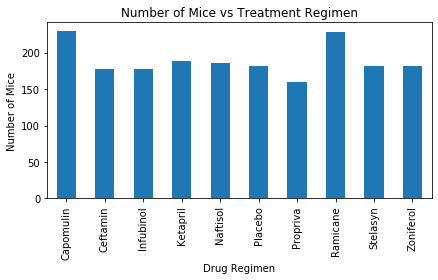

In [126]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barpd_data = clean_data.groupby('Drug Regimen').count()['Mouse ID']
bar_plot_data = barpd_data.plot.bar(rot='vertical',title='Number of Mice vs Treatment Regimen')
plt.tight_layout()
bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Mice")

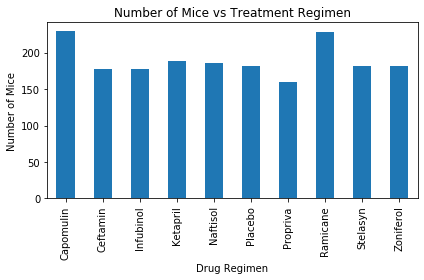

In [125]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
barpd_data = clean_data.groupby('Drug Regimen').count()['Mouse ID']
barpd_data_df = pd.DataFrame(barpd_data)

plt.xdata = barpd_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice vs Treatment Regimen')
plt.tight_layout()
plt.show()



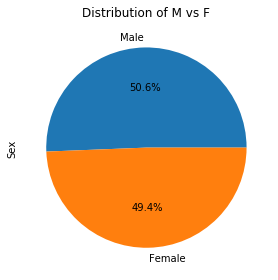

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data['Sex'].value_counts()
plt.figure()
gender.plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of M vs F')
plt.tight_layout()
plt.show()


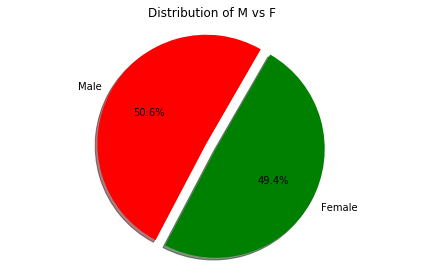

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["red", "green"]
explode = (0.1,0)
plt.figure()
plt.pie(gender.values, explode=explode, labels=gender.index.values, colors=colors, autopct='%1.1f%%', shadow=True, startangle=60)

plt.axis('equal')
plt.title("Distribution of M vs F")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

reg_mice = reg_mouse_grp.last()
best_regis = [b for b in top_regimens]
reg_output = [reg_mice['Tumor Volume (mm3)'][best_regis]]
reg_output_df = pd.DataFrame(reg_output).transpose().reset_index()
reg_output_df



,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [131]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

regimen_list = clean_data.index.to_list()
top_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

tum_vol = [reg_output_df.loc[reg_output_df['Drug Regimen'] == best_regis[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tum_vol[i].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f"The IQR for the regimen at 'Best Regimen' List Item {i+1} is {IQR}'.")
    if (lower_bound < tum_vol[i].min()) & (upper_bound > tum_vol[i].max()):
            print(f"\There are no outliers at 'Best Regimen' List Item {i+1}'.")
    else: 
            print(f"\There is at least 1 outlier at 'Best Regimen' List Item {i+1}'.")

The IQR for the regimen at 'Best Regimen' List Item 1 is 7.78'.
\There are no outliers at 'Best Regimen' List Item 1'.
The IQR for the regimen at 'Best Regimen' List Item 2 is 9.1'.
\There are no outliers at 'Best Regimen' List Item 2'.
The IQR for the regimen at 'Best Regimen' List Item 3 is 11.48'.
\There is at least 1 outlier at 'Best Regimen' List Item 3'.
The IQR for the regimen at 'Best Regimen' List Item 4 is 15.58'.
\There are no outliers at 'Best Regimen' List Item 4'.


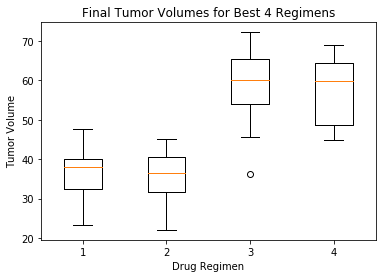

In [133]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Cap box plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tum_vol)
ax1.set_title('Final Tumor Volumes for Best 4 Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')

plt.show()


## Line and Scatter Plots

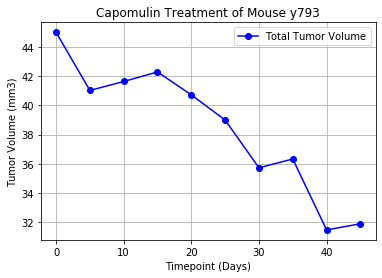

In [134]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
sline_data = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "y793")]
sline_data = sline_data.groupby(["Drug Regimen", "Timepoint"])
sline_df = sline_data["Tumor Volume (mm3)"].mean().to_frame()
sline_index_data_df = sline_df.unstack(0)
slineplot_df = sline_index_data_df["Tumor Volume (mm3)"]

xaxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
slinetotal, = plt.plot(xaxis, slineplot_df["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume")

plt.title('Capomulin Treatment of Mouse y793')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(handles=[slinetotal], loc="best")
plt.grid(True)
plt.show()

In [135]:
#show data table for single mouse
sline_df = combined_data.loc[combined_data["Mouse ID"] == "y793",:]
sline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2


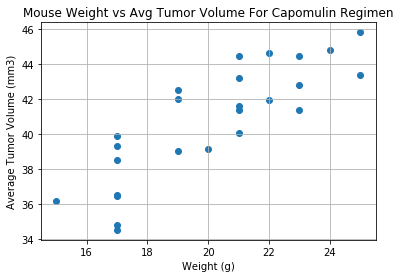

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
c_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]

c_df_average = c_df.groupby(['Mouse ID']).mean()
plt.scatter(c_df_average['Weight (g)'], c_df_average['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight vs Avg Tumor Volume For Capomulin Regimen')
plt.grid()
plt.show()

## Correlation and Regression

The R-Value between Mouse Weights and Tumor Volumes is 0.84 for Capomulin Mice.


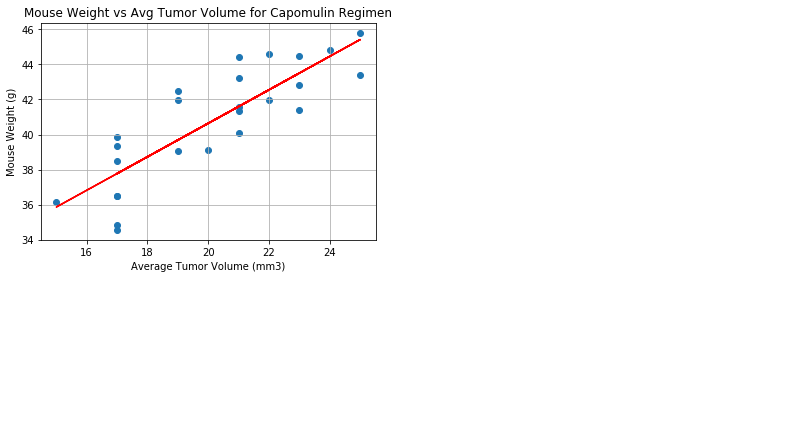

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = c_df_average["Weight (g)"]
y_values = c_df_average["Tumor Volume (mm3)"]

plt.figure()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = sp.linregress(x_values, y_values)
print(f"The R-Value between Mouse Weights and Tumor Volumes is {round(r_value, 2)} for Capomulin Mice.")


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(35,23),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.grid()
plt.show()
